# Detect and Remove Outliers using Python


Outliers are data points that deviate significantly from the rest of the data. These data points lie far away from 
the majority of the data points and can have a substantial impact on statistical analysis and modelling. If you want
to learn how to detect and remove outliers from your data, this article is for you. In this article, I’ll take you through
how to detect and remove outliers using Python.

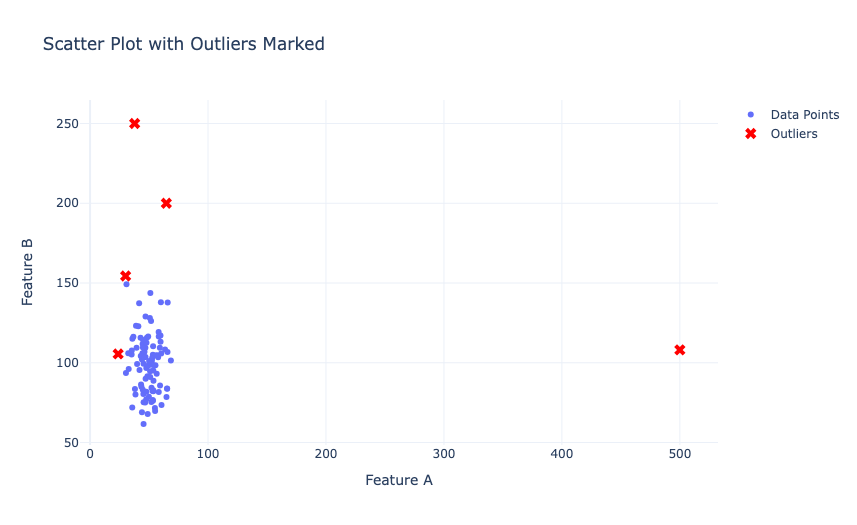

In [27]:
from PIL import Image
from IPython.display import display

# Replace 'image_file_path' with the path to your image file
image_file_path = r"C:\Users\SHIVA KUMAR\Desktop\HD\OneDrive\Documents\ratan\detect-and-remove-outliers.webp"

# Open the image file
img = Image.open(image_file_path)

# Display the image in the notebook
display(img)


In the above image, the data points are represented with regular markers, 
while the outliers are marked with red ‘x’ markers. You can see that some
data points are deviating from the bulk of the data distribution. These 
points are nothing but outliers.

Outliers can arise due to various reasons, including data entry mistakes,
as well as genuine deviations in the data. Let’s explore both scenarios with 
examples:

A data entry error: Consider a dataset of student exam results in a particular subject. 
    Most student scores range from 60 to 90, but due to a data entry error, a student’s 
    score is recorded as 200. This value is much higher than all other scores and is likely 
    an outlier. Such an outlier could have a significant impact on any analysis or model built using this data.
A Genuine Deviation: In a dataset of annual employee earnings for a tech company, most salaries 
    fall within a range. However, the CEO’s income is exceptionally high compared to others.
    It is a genuine deviation since it reflects the significant income gap for a high-level executive. 
    In this case, the outlier represents valuable information rather than an error.
The approach to dealing with outliers depends on the context and the reason for their occurrence.
In some cases, it’s appropriate to remove outliers or apply data cleaning techniques. 

However, if the outliers are genuine and represent important information, it is essential to retain 
them in the dataset and consider robust methods that are not strongly influenced by the outliers. 
Thoughtful treatment of outliers ensures that we avoid bias in our analysis while capturing valuable insights from the data.

How to Detect and Remove Outliers?
Detecting outliers involves identifying data points that appear to be unusually distant 
from the bulk of the data distribution. There are several statistical methods to detect outliers, including:

Z-Score Method:- This method measures how many standard deviations a data point is away from 
                 the mean. Data points with a Z-score greater than a predefined threshold (often 2 or 3)
                 are considered outliers.
IQR (Interquartile Range) Method:- The IQR is the range between the 75th and 25th percentiles of the data. 
                        Data points below Q1 – 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.
                        Visualization: Plotting the data on a box plot or scatter plot can help visually identify outliers that
                        fall far outside the main cluster of data points.
Once you have detected outliers, you can:

exclude the identified outliers from the dataset;
apply data transformations, such as logarithmic or square root transformations, to mitigate the effect of outliers;
replace outliers with more reasonable values through imputation techniques like using the median or mean
of the non-outlying data points;

# Detect and Remove Outliers using Python:-
    
    

In [14]:
import numpy as np
import pandas as pd

# Create a sample dataset with outliers
np.random.seed(42)
data = pd.DataFrame({
    'Feature_A': np.random.normal(loc=50, scale=10, size=100),
    'Feature_B': np.random.normal(loc=100, scale=20, size=100),
})

# Add some outliers to the dataset
data.iloc[5, 0] = 500
data.iloc[20, 1] = 200
data.iloc[35, 1] = 250

In [26]:
data

,Feature_A,Feature_B
0,54.967142,71.692585
1,48.617357,91.587094
2,56.476885,93.145710
3,65.230299,83.954455
4,47.658466,96.774286
...,...,...
95,35.364851,107.706348
96,52.961203,82.322851
97,52.610553,103.074502
98,50.051135,101.164174


In [15]:
data.shape

(100, 2)

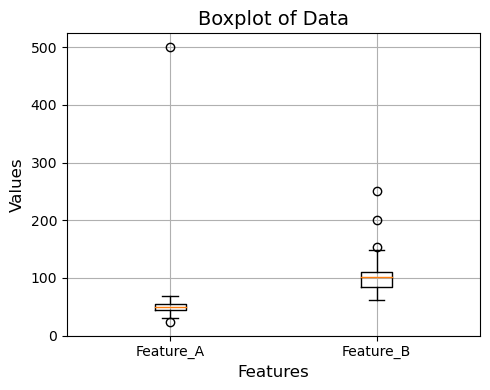

In [30]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(5, 4))  # Adjust the figure size if needed
plt.boxplot(data.values)
plt.title('Boxplot of Data', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(ticks=range(1, data.shape[1] + 1), labels=data.columns)  # Setting x-axis labels
plt.grid(True)
plt.tight_layout()

plt.show()



# Here’s how to remove outliers using Python by using the z-score method:

In [16]:
from scipy import stats

# Function to detect and remove outliers using Z-score method
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data

# Detect and remove outliers
filtered_data = remove_outliers_zscore(data)

In [17]:
filtered_data.shape

(97, 2)

# You can also use the IQR method to remove outliers. 


In [18]:
#Here’s how to remove outliers using Python by using the IQR method:
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[~((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)]
    return filtered_data
  
# Detect and remove outliers
filtered_data = remove_outliers_iqr(data)

In [19]:
filtered_data.shape

(95, 2)

"""Now let’s say you don’t want to remove outliers. You want to replace them with the 
median value. Here’s how you can replace the value 
of outliers with the median value using Python:"""

In [ ]:
# Function to detect and replace outliers with median using IQR method

def replace_outliers_with_median(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Replace outliers with the median value
    median_value = data.median()
    data_replaced = data.where(~((data < lower_bound) | (data > upper_bound)), median_value, axis=0)

    return data_replaced
# Detect and replace outliers  
filtered_data = replace_outliers_with_median(data)

In [23]:
filtered_data.shape

(100, 2)

So this is how you can detect and remove outliers from your data using Python.
Detecting and removing outliers is a part of data preprocessing.

Summary:-
Outliers are data points that deviate significantly from the rest of the data. These data points lie far away 
from the majority of the data points and can have a substantial impact on statistical analysis and modelling. 
I hope you liked this article on how to detect and remove outliers using Python. Feel 
free to ask valuable questions in the comments section below.